## ADI-SOYADI: ÖMER-CEBECİ 
## NUMARASI: 225023002010 
## PROJE-2 KODLARI

In [14]:
##Kütüphanelerin eklenmesi
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.io import loadmat
import math
import os
import pandas as pd 
from matplotlib import style
from enum import Enum
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [15]:
chest_imu=21
ankle_imu=38
hand_imu=4

## .dat uzantılı dosyada verilerin bulunduğu sütunlar
accel_16g_data=[2,4]
accel_6g_data=[5,7]
gyro_data=[8,10]

In [16]:
def GetData(adres, imu_tipi,aktivite): # aktivite verilerini liste olarak veren fonksiyon
    accel_16g_x=[]
    accel_16g_y=[]
    accel_16g_z=[]

    accel_6g_x=[]
    accel_6g_y=[]
    accel_6g_z=[]

    gyro_x=[]
    gyro_y=[]
    gyro_z=[]
    
    data = np.loadtxt(adres, unpack = True)
    data=np.transpose(data)
    for n in range (0,len(data)):
        if(data[n,1]==aktivite):
                accel_16g_x.append(data[n, imu_tipi-1 + 1])
                accel_16g_y.append(data[n, imu_tipi-1 + 2])
                accel_16g_z.append(data[n, imu_tipi-1 + 3])
                
                accel_6g_x.append(data[n, imu_tipi-1 + 4])
                accel_6g_y.append(data[n, imu_tipi-1 + 5])
                accel_6g_z.append(data[n, imu_tipi-1 + 6])
                
                gyro_x.append(data[n, imu_tipi-1 + 7])
                gyro_y.append(data[n, imu_tipi-1 + 8])
                gyro_z.append(data[n, imu_tipi-1 + 9])
    
    return accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z

## İlgili veri tipinin zaman ekseni,frekans ekseni ve power spectral density grafiklerini çizdiren fonksiyon
def PlotData(data,data_tipi,data_ekseni,k):
    data=np.array(data)
    data = data[np.logical_not(np.isnan(data))] ## nan degerleri atıldı 
    
    N=len(data) 
    
  
    
    
    n=np.arange(0,N) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
    plt.figure(figsize=(10, 8))
    plt.plot(n,data)
    plt.xlabel("$n (sample)$")
    plt.title("$Subject$"+k+" "+"$kisisi$"+ data_tipi+" "+ data_ekseni+" "+"$ grafigi $")
    
    
    w = np.arange(-np.pi, np.pi, 2*np.pi/N) # omega ekseninin -pi ile +pi arasında tanımlanması
    xw = np.fft.fftshift(np.fft.fft(data,N)/N) # ayrık zamanlı işaretin Fourier transformu
     #çizdirme işleminin ypılması için x ve y eksenlerinin eşit uzunlukta olması gerekir bu yüzden
    # uzun olan eksenin son verisi alınmamıştır. Bu durumun Xw grafiğini etkilemediği gözlemlenmiştir.  
    if(len(xw)>len(w)):
        xw=xw[:-1]
    elif (len(w)>len(xw)):
        w=w[:-1]
    
    
    plt.figure(figsize=(10, 8))
    plt.stem(w*100/(2*np.pi),abs(xw)) # X(w) işaretinin genlik grafiğinin çizdirilmesi fiziksel frekans ekseninde
    plt.xlabel("$F[Hz]$") # grafiğin x ekseninin isimlendirilmesi
    plt.title("$Subject$"+k+ " "+ "$kisi$"+ " " +data_tipi+ " "+ data_ekseni+" ""$foruier$"+ " " + "$grafigi$")
    plt.show()
    
    #Power Spectral Density grafiğnin çizdirlmesi  [Welch (Periodogram) yöntemi ile ]
    plt.figure(figsize=(10, 8))
    plt.psd(data,NFFT = 150,Fs=100,window = mlab.window_none)
    plt.title("$Subject$"+k+ " "+ "$kisi$"+ " " +data_tipi+ " "+ data_ekseni+" "+"periodo-gram")
    plt.show()
    
def Apply_Filter(filter_path,data,title,eksen_bilgisi,k):
    ##data dan nan değerlerin atılması 
    data=np.array(data)
    data = data[np.logical_not(np.isnan(data))] ## nan degerleri atıldı 

    # FIR filtrenin eklenmesi 
    filter_data = loadmat(filter_path) 
    coef=filter_data['Num']
    yn = sgnl.lfilter(coef[0],1,data[:5000]) ##coef[0] alınmasının sebebi AGF filtre olduğu için sadece zeros mevcut


    PlotData(yn,title,eksen_bilgisi,k)
    return yn 
    

In [17]:

## Bireylerin verilerinin bulunduğu adresler...
adres_102="PAMAP2_Dataset/Protocol/subject102.dat"
adres_101="PAMAP2_Dataset/Protocol/subject101.dat"
adres_103="PAMAP2_Dataset/Protocol/subject103.dat"
adres_104="PAMAP2_Dataset/Protocol/subject104.dat"
adres_105="PAMAP2_Dataset/Protocol/subject105.dat"
adres_106="PAMAP2_Dataset/Protocol/subject106.dat"
adres_107="PAMAP2_Dataset/Protocol/subject107.dat"
adres_108="PAMAP2_Dataset/Protocol/subject108.dat"
adres_109="PAMAP2_Dataset/Protocol/subject109.dat"




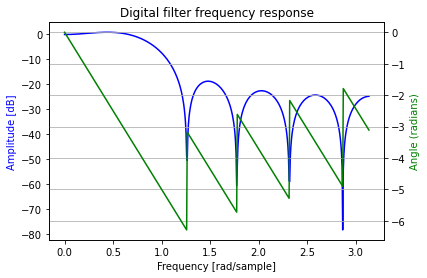

In [18]:
#Filtrenin genlik ve faz grafiklerinin çizdirilmesi 
filter_data = loadmat('lowpass_15hz.mat')
Coeffs = filter_data['Num'] 


w, Hw = sgnl.freqz(Coeffs[0],1)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')


ax1.plot(w, 20 * np.log10(abs(Hw)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')


ax2 = ax1.twinx()
angles = np.unwrap(np.angle(Hw))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


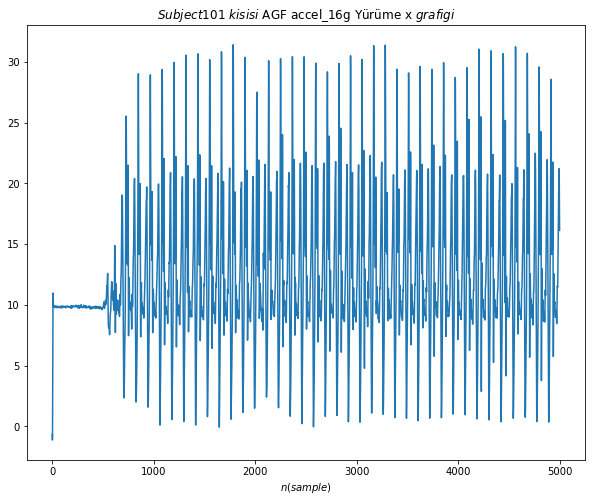

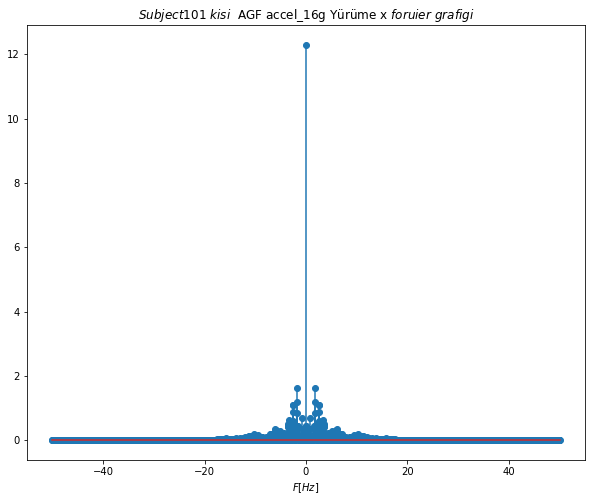

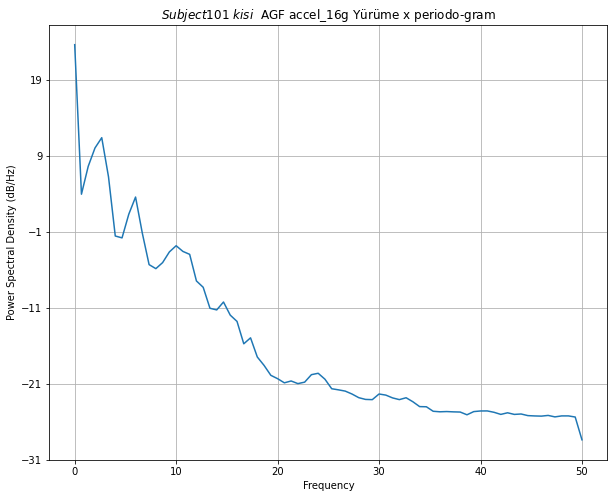

In [19]:
#### Subject101 AGF Uygulanmadan Once ####
## Yurume Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,4)
#### Subject101 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yürüme"
eksen_bilgisi="x"
k=str(101)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)


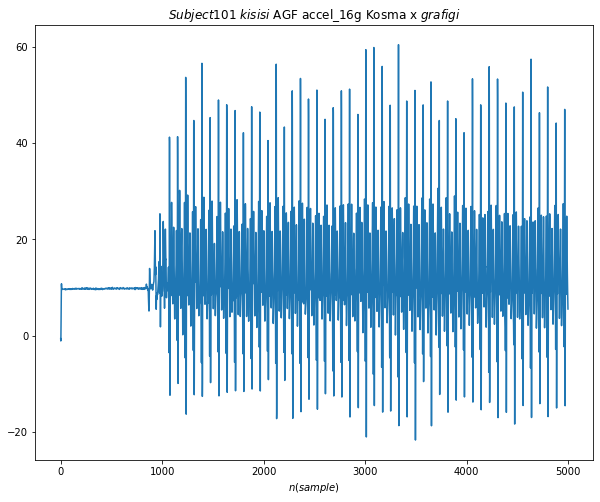

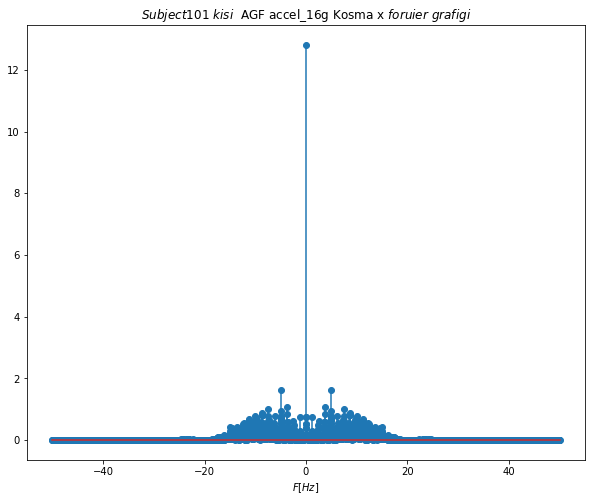

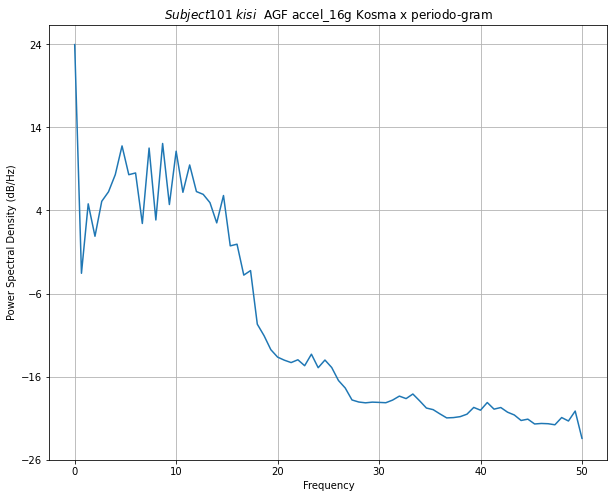

In [20]:
#### Subject101 AGF Uygulanmadan Once ####
## Kosma Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,5)
#PlotData(accel_16g_x[0:5000]," accel_16g ","x",str(101))

#### Subject101 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(101)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

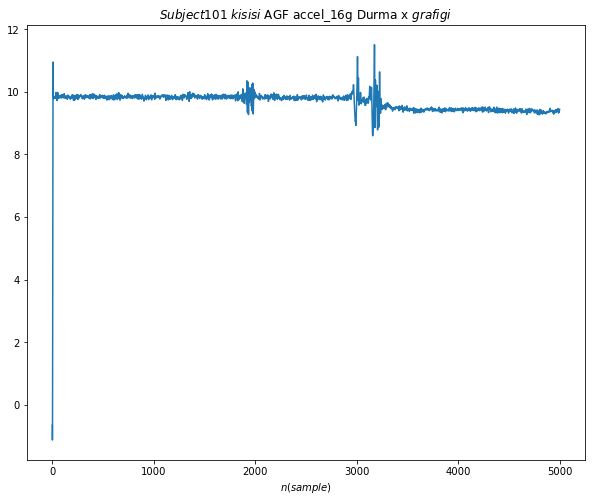

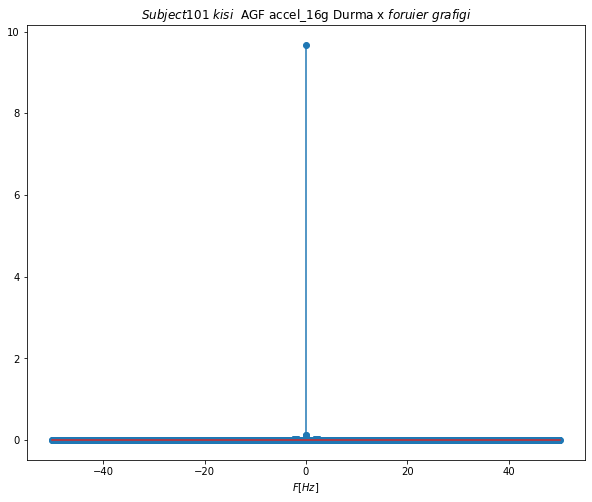

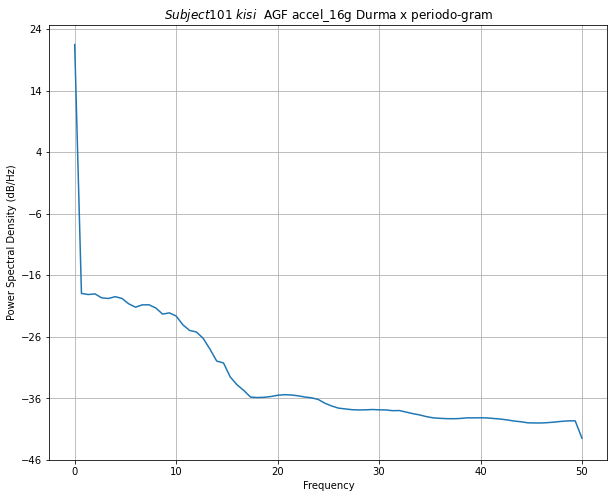

In [21]:
#### Subject101 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,3)
#PlotData(accel_16g_x[0:5000]," accel_16g ","x",str(101))

#### Subject101 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma"
eksen_bilgisi="x"
k=str(101)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

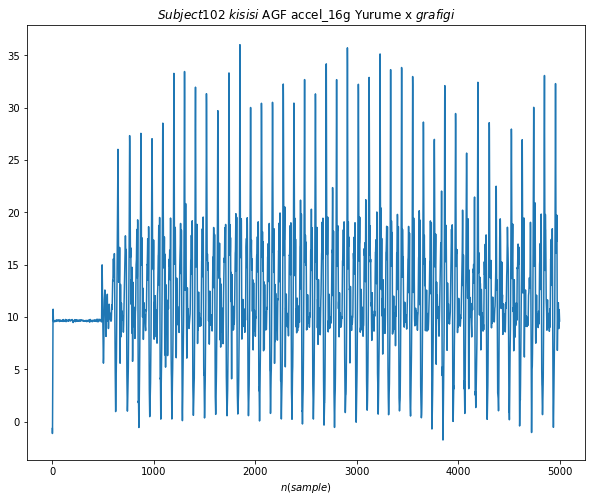

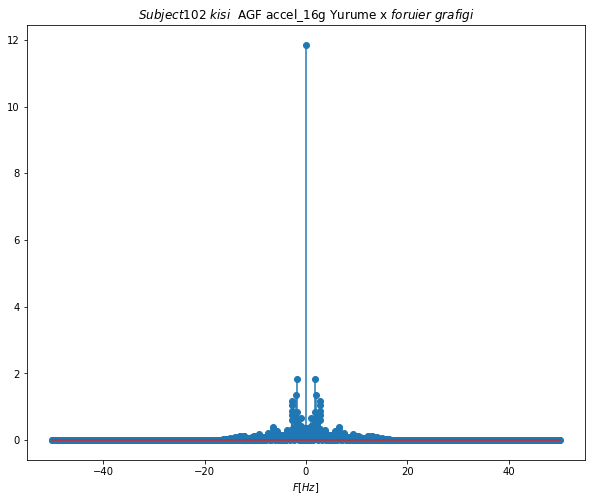

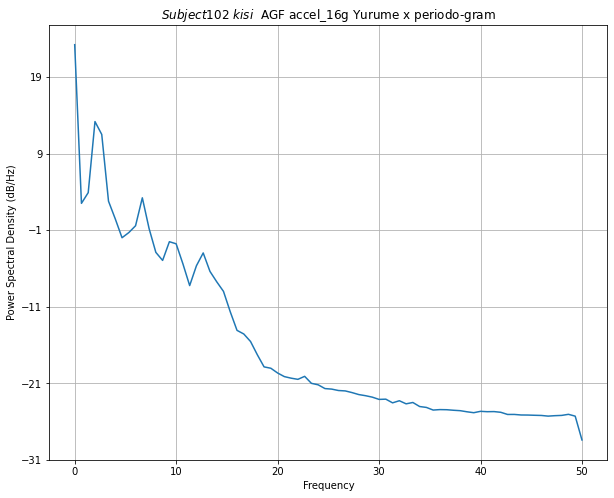

In [22]:
#### Subject102 AGF Uygulanmadan Once ####
## Yurume Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,4)


#### Subject102 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yurume"
eksen_bilgisi="x"
k=str(102)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

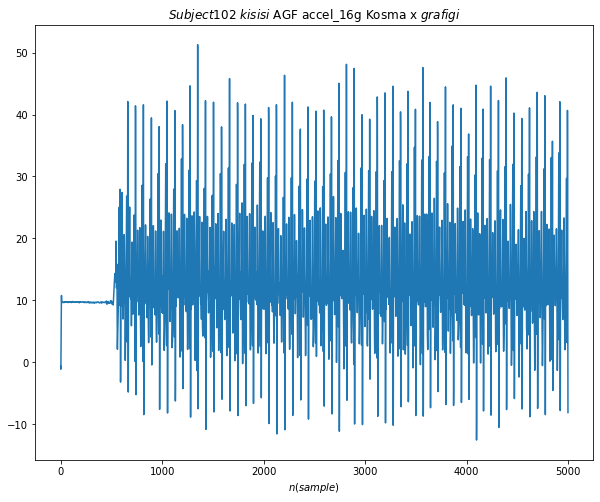

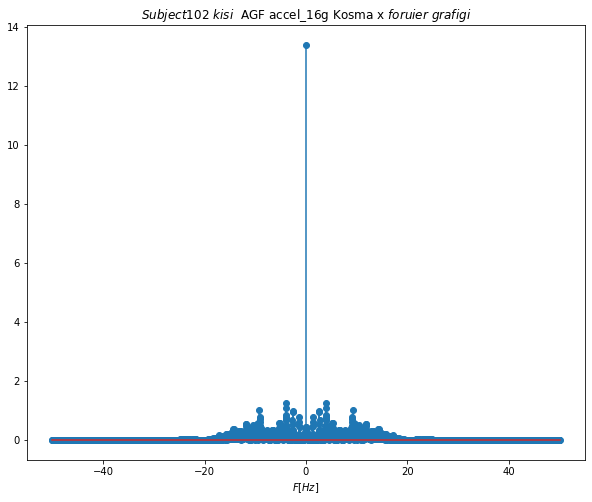

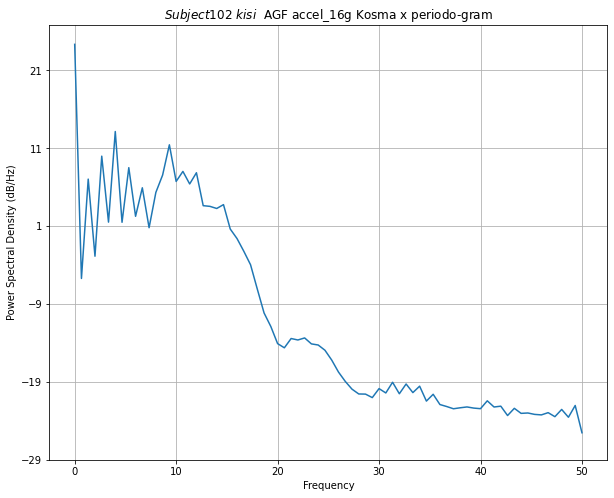

In [23]:
#### Subject102 AGF Uygulanmadan Once ####
## Kosma Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,5)


#### Subject102 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(102)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

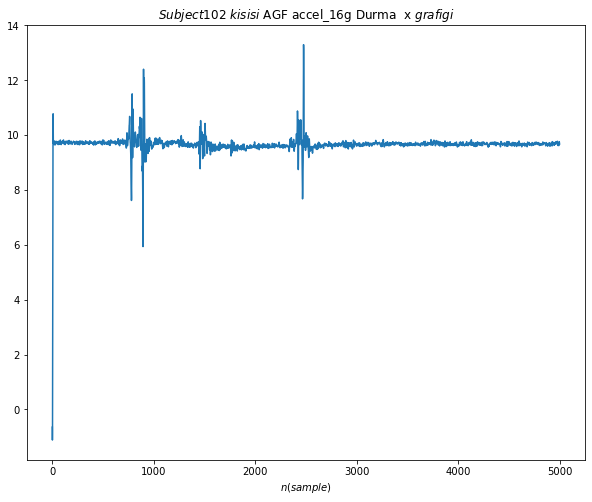

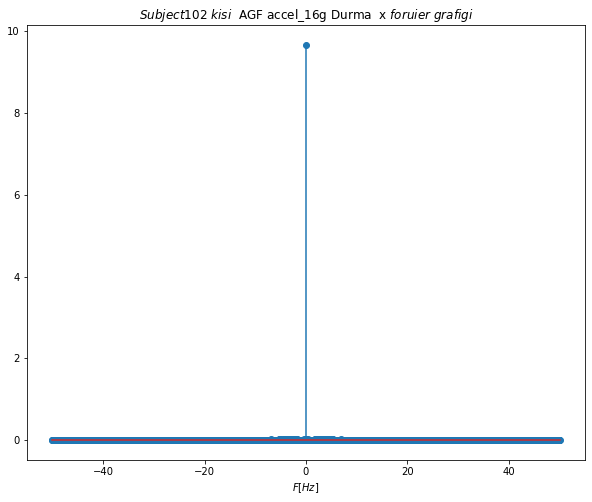

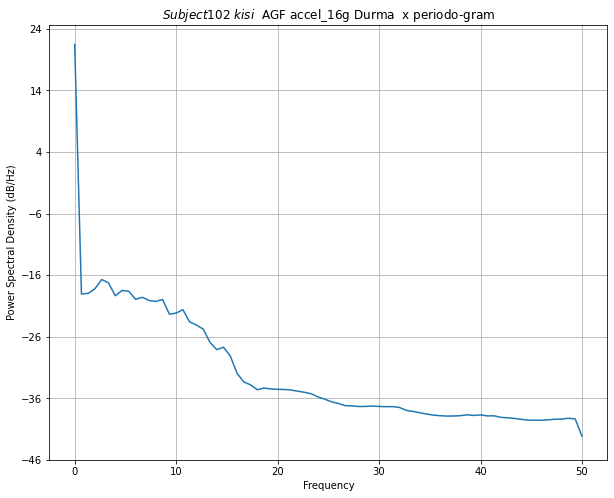

In [24]:
#### Subject102 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,3)


#### Subject102 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma "
eksen_bilgisi="x"
k=str(102)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

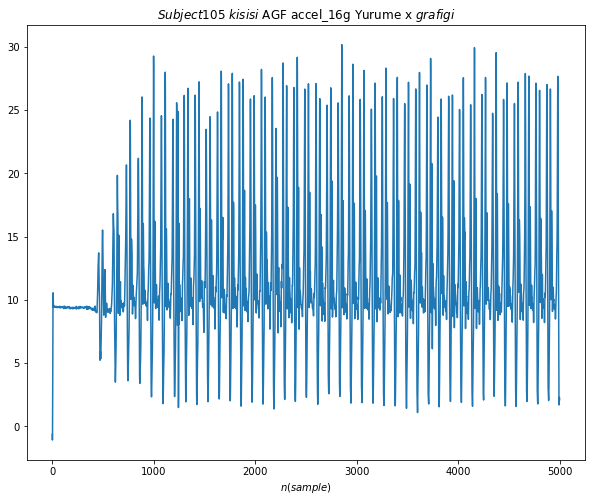

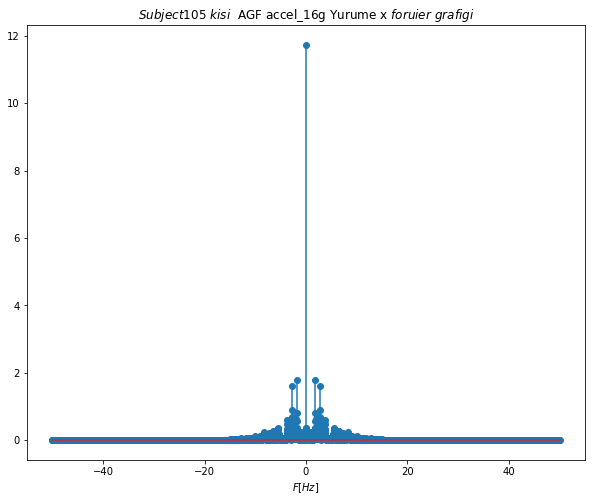

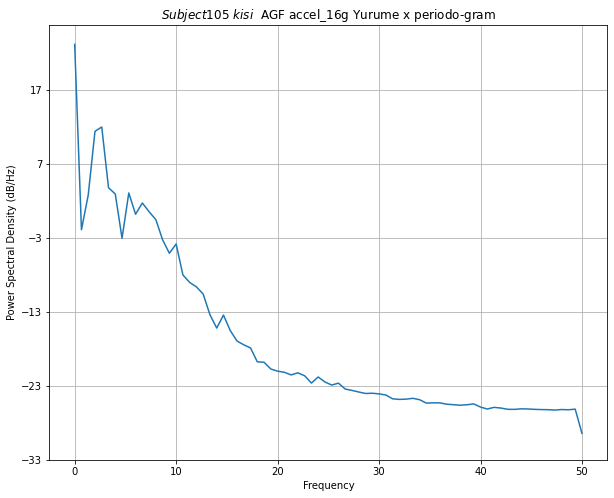

In [25]:
#### Subject105 AGF Uygulanmadan Once ####
## Yurume Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_105,ankle_imu,4)


#### Subject105 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yurume"
eksen_bilgisi="x"
k=str(105)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

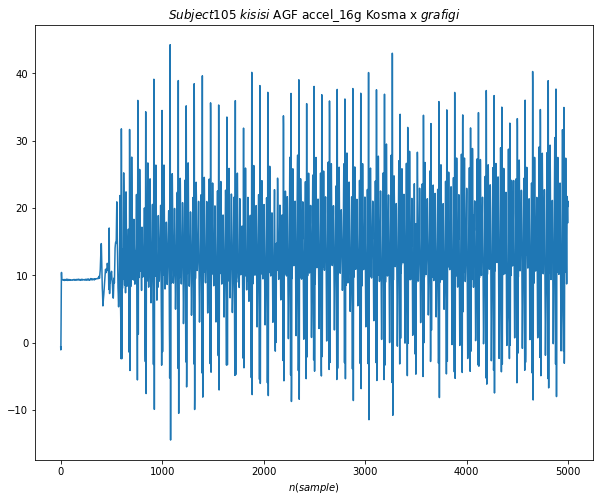

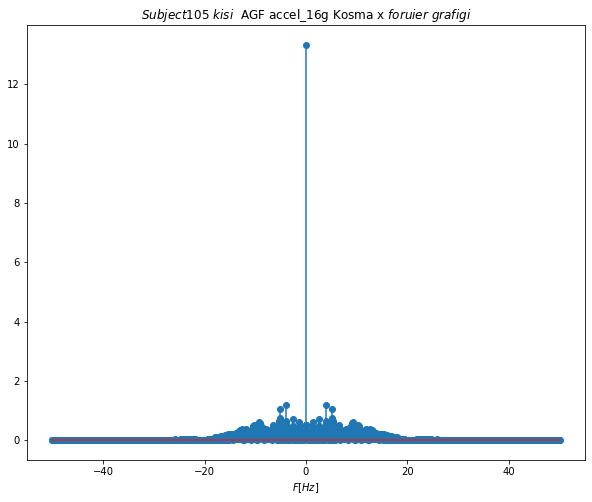

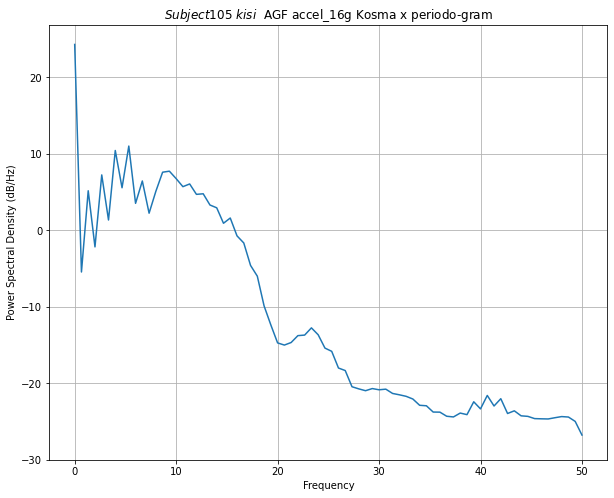

In [26]:
#### Subject105 AGF Uygulanmadan Once ####
## Kosma Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_105,ankle_imu,5)

#### Subject105 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(105)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

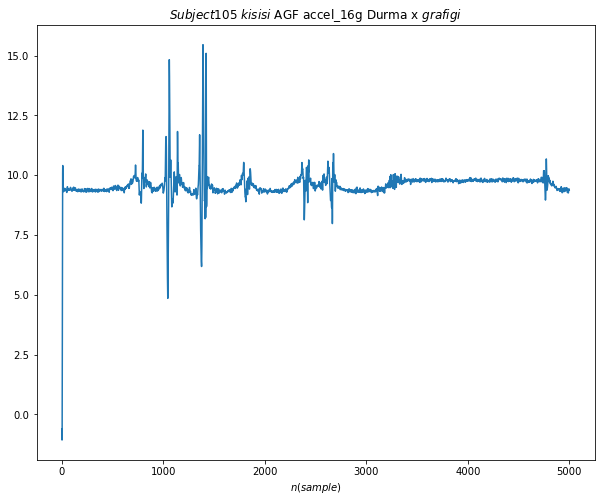

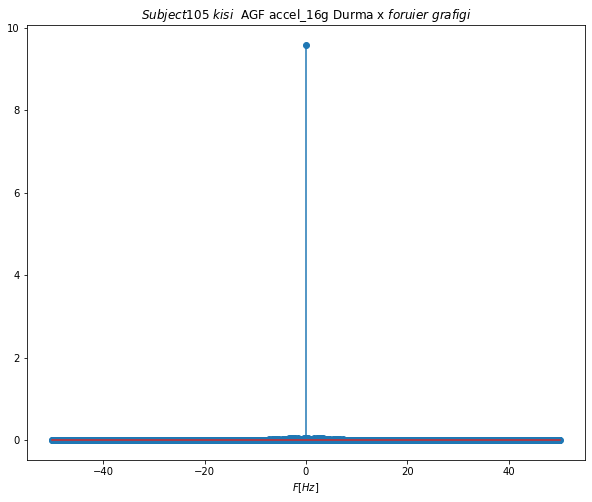

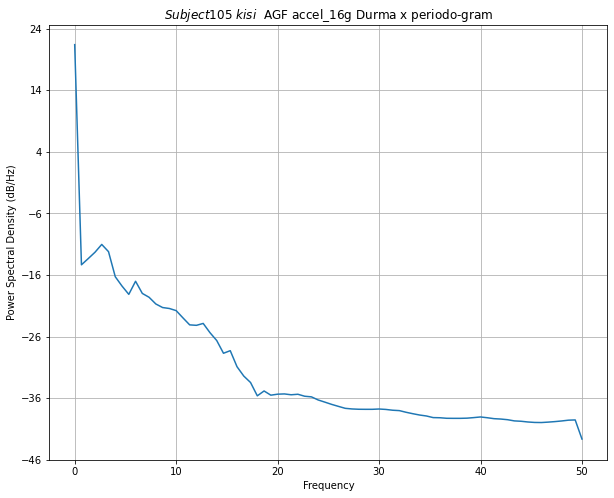

In [27]:
#### Subject105 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_105,ankle_imu,3)


#### Subject105 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma"
eksen_bilgisi="x"
k=str(105)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

In [28]:
########################################################

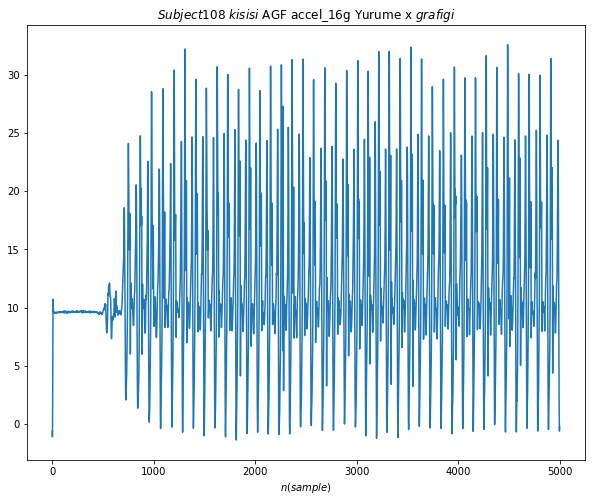

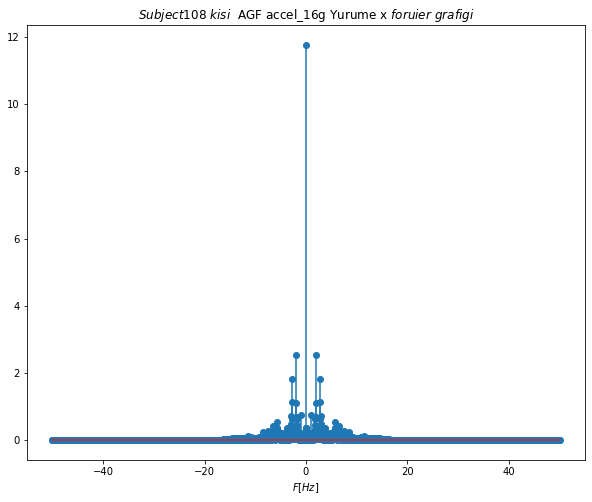

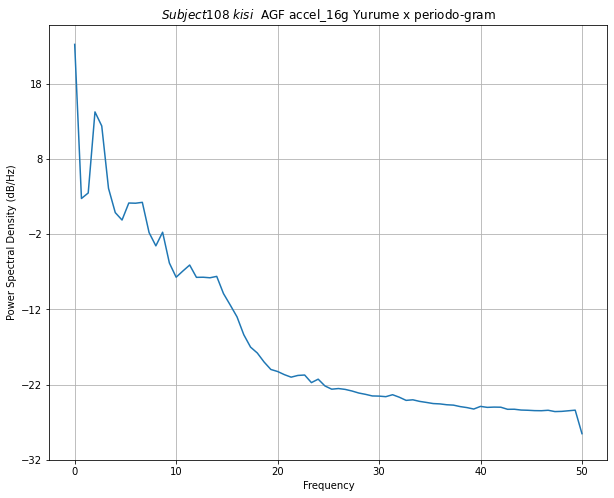

In [29]:
#### Subject108 AGF Uygulanmadan Once ####
## Yurume Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_108,ankle_imu,4)

#### Subject108 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yurume"
eksen_bilgisi="x"
k=str(108)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

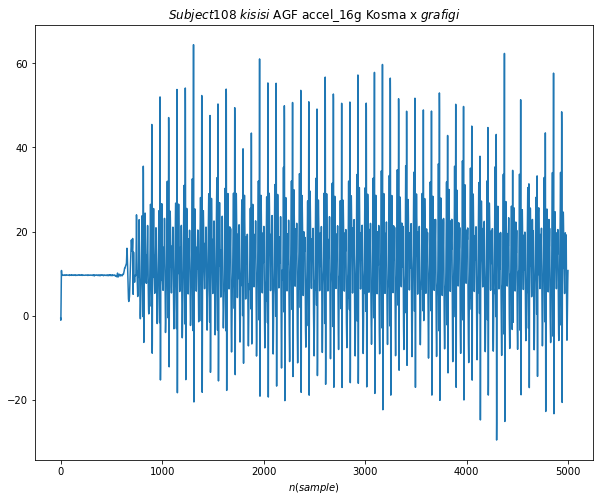

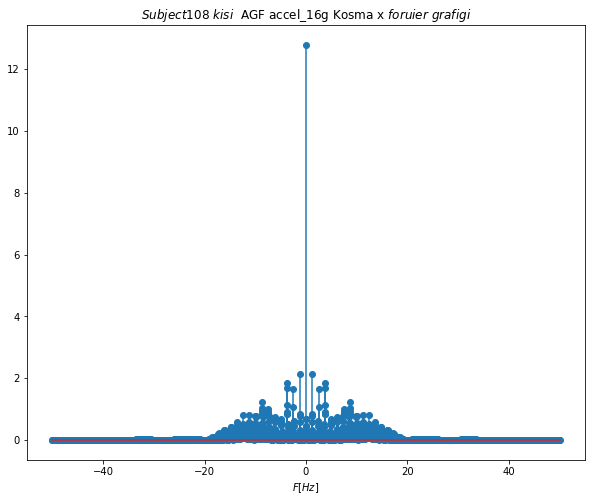

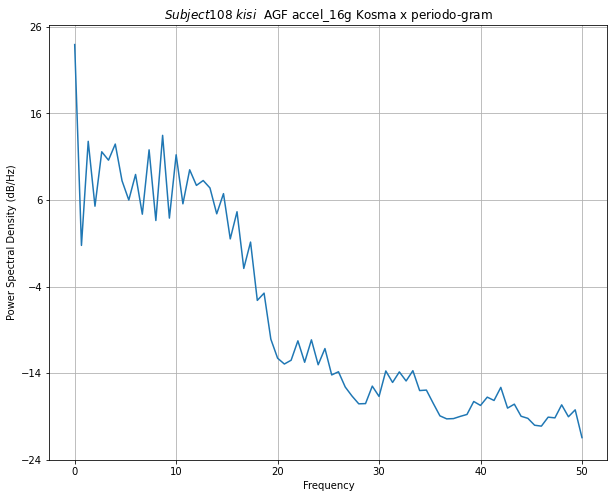

In [30]:
#### Subject108 AGF Uygulanmadan Once ####
## Kosma Verileri####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_108,ankle_imu,5)


#### Subject108 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(108)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

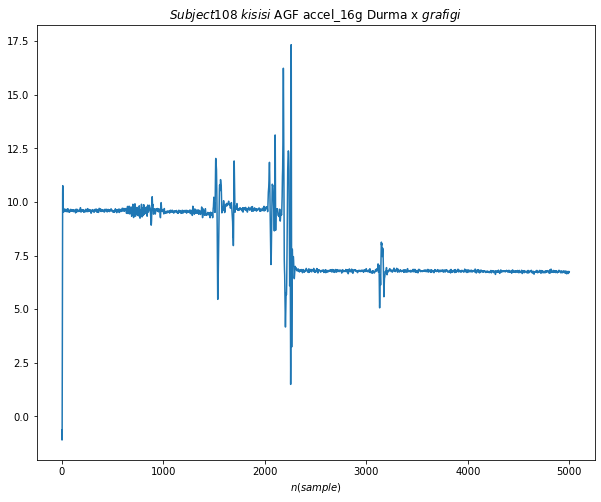

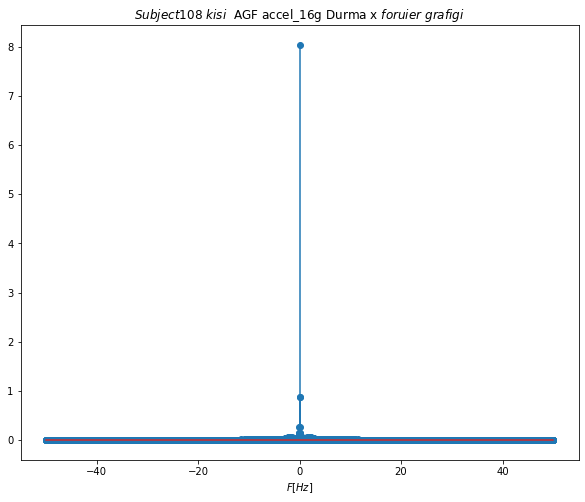

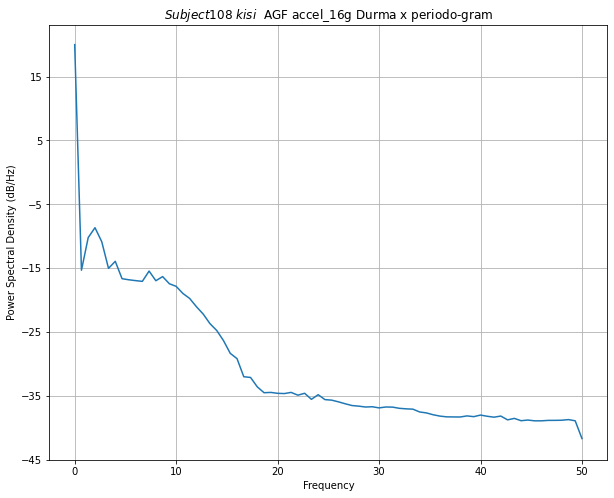

In [31]:
#### Subject108 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_108,ankle_imu,3)


#### Subject108 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma"
eksen_bilgisi="x"
k=str(108)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

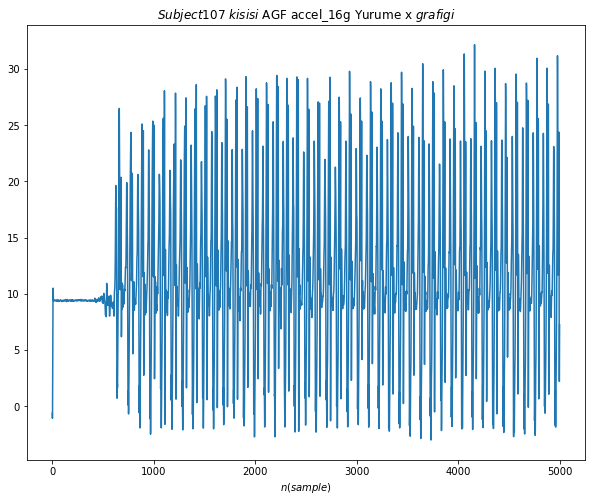

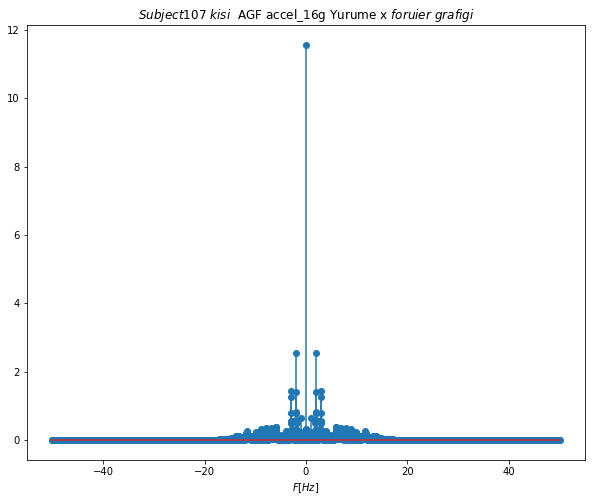

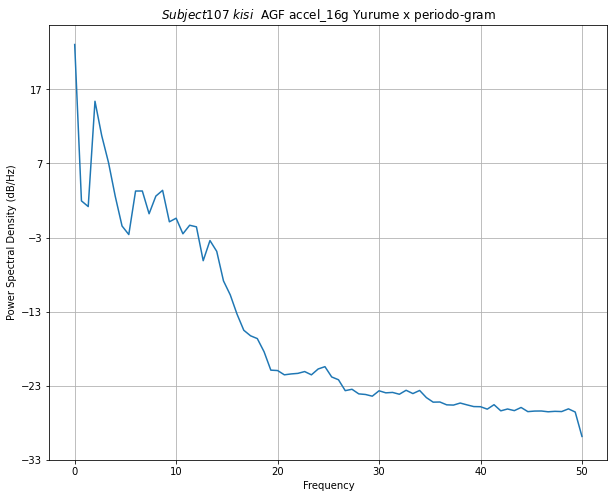

In [32]:
#### Subject107 AGF Uygulanmadan Once ####
## yurume Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_107,ankle_imu,4)


#### Subject108 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yurume"
eksen_bilgisi="x"
k=str(107)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

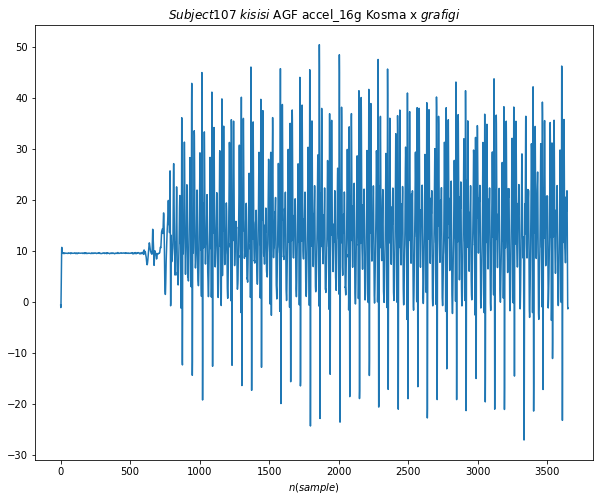

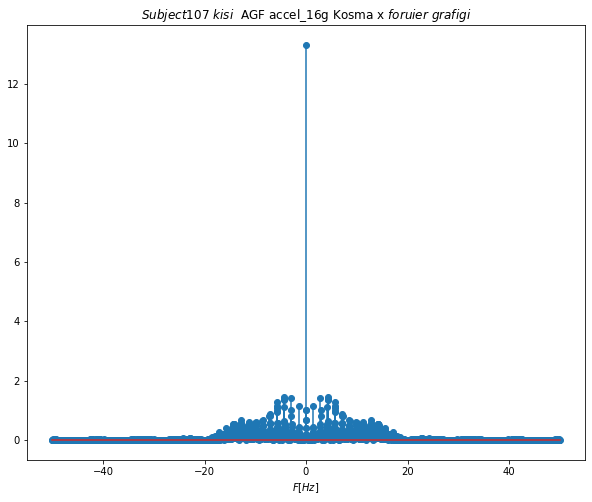

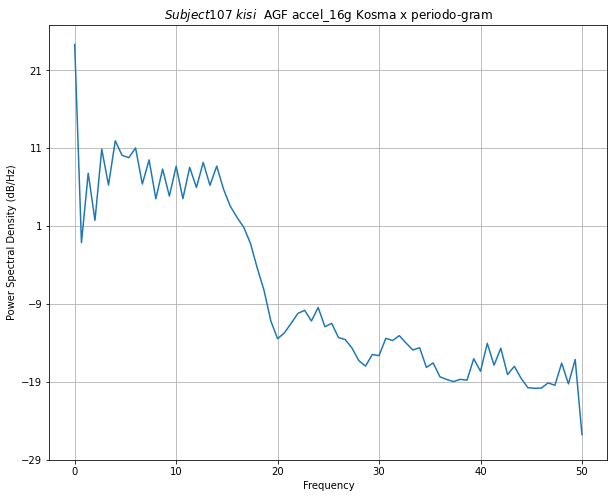

In [33]:
#### Subject107 AGF Uygulanmadan Once ####
## Koşma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_107,ankle_imu,5)


#### Subject107 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(107)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

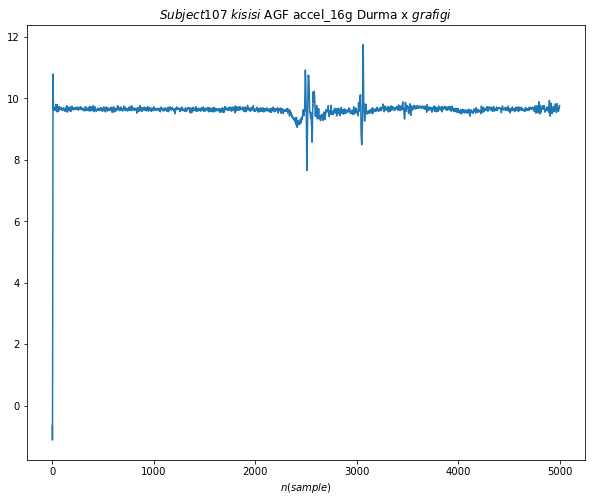

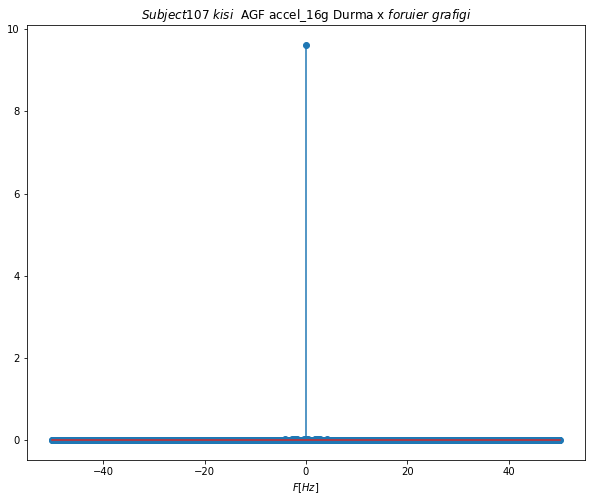

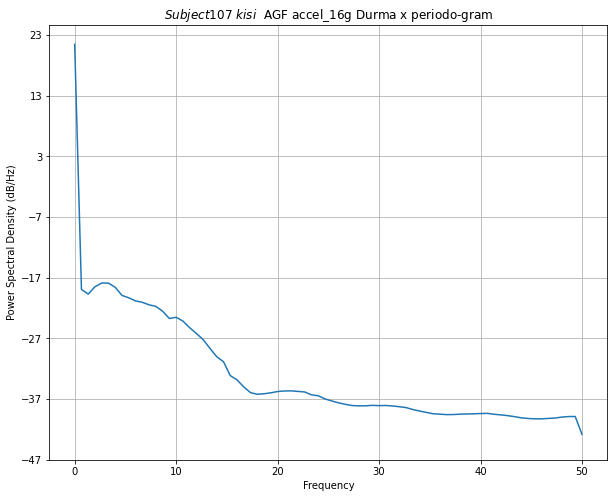

In [34]:
#### Subject107 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_107,ankle_imu,3)


#### Subject107 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma"
eksen_bilgisi="x"
k=str(107)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

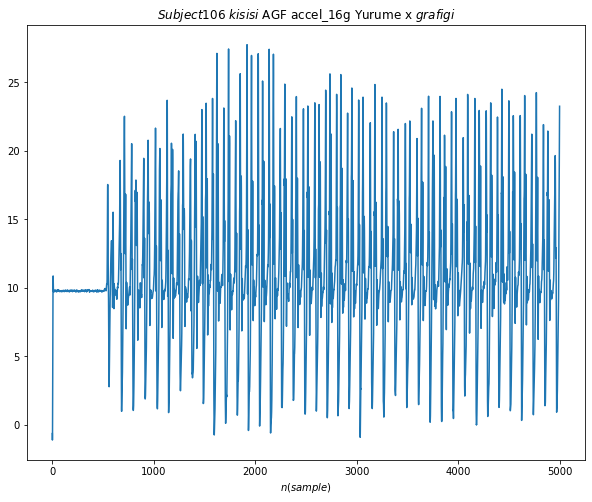

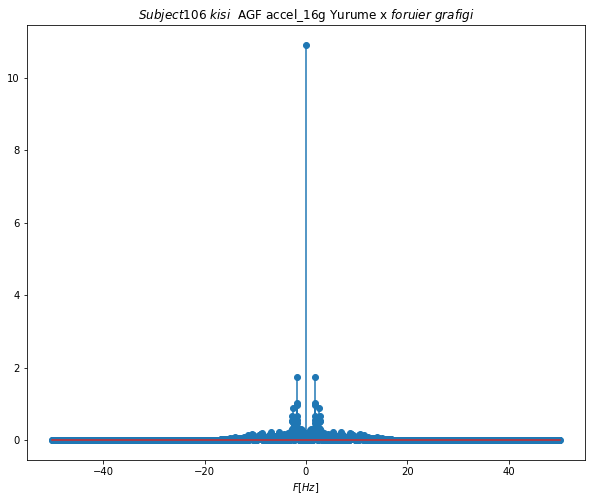

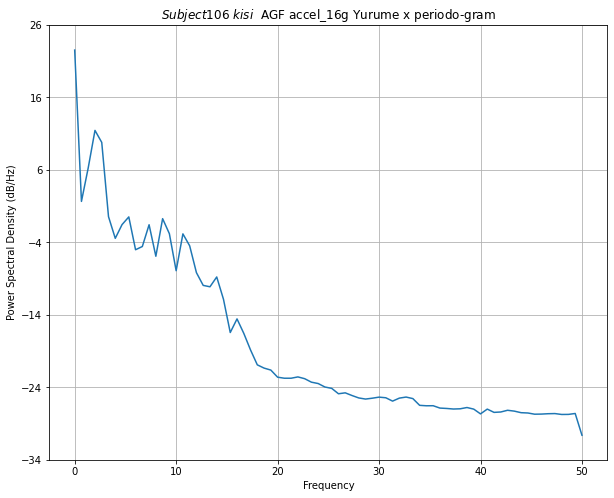

In [35]:
#### Subject106 AGF Uygulanmadan Once ####
## Yürüme Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_106,ankle_imu,4)


#### Subject106 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Yurume"
eksen_bilgisi="x"
k=str(106)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

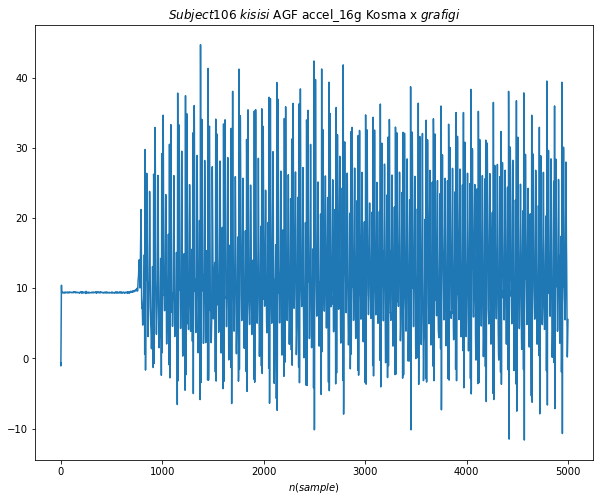

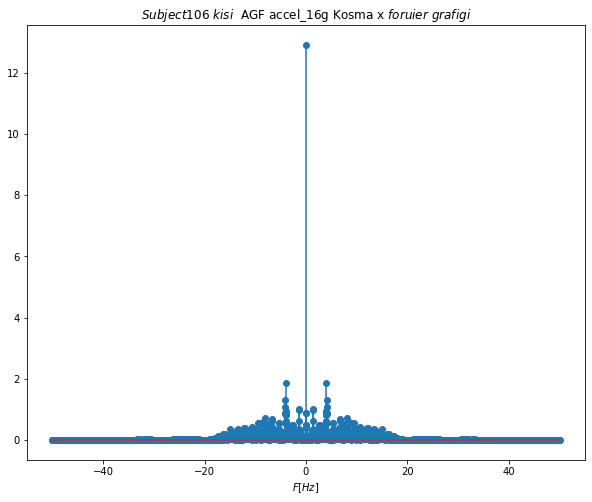

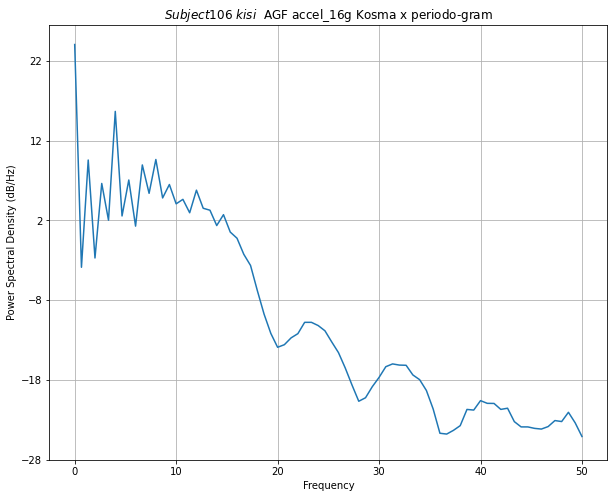

In [36]:
#### Subject106 AGF Uygulanmadan Once ####
## Koşma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_106,ankle_imu,5)


#### Subject106 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Kosma"
eksen_bilgisi="x"
k=str(106)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

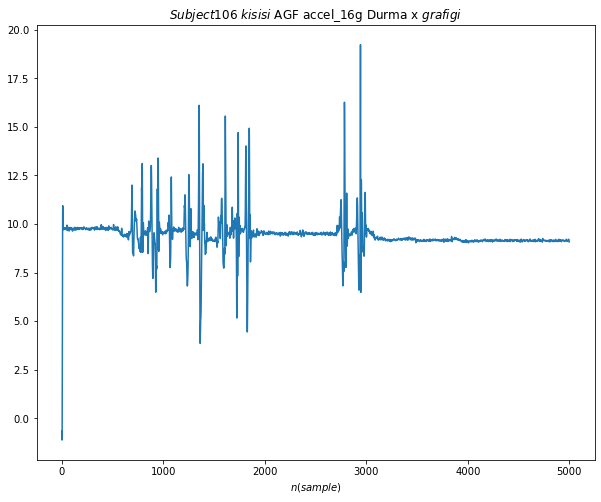

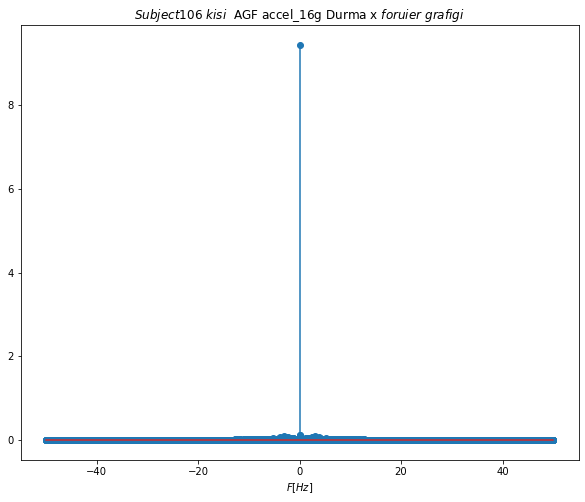

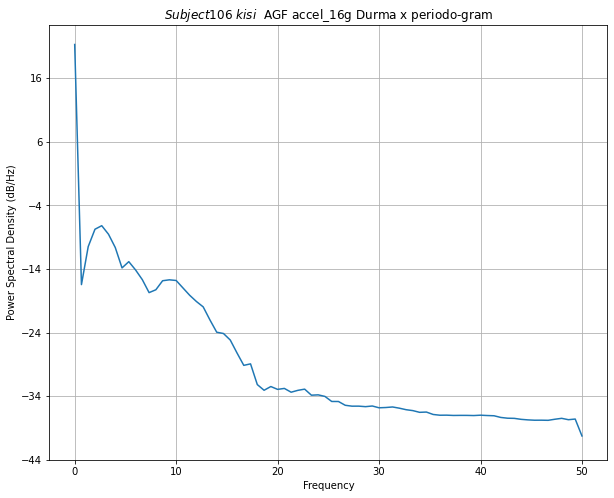

In [37]:
#### Subject106 AGF Uygulanmadan Once ####
## Durma Verileri ####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_106,ankle_imu,3)


#### Subject106 AGF Uyguladıktan Sonra ####
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g Durma"
eksen_bilgisi="x"
k=str(106)
yn=Apply_Filter(filter_path,data,title,eksen_bilgisi,k)

## WELCH YÖNTEMİNİN FARKLI PENCERE VE PENCERE UZUNLUĞUNDA İNCELENMESİ 

## Subject101 için hamming, hanning ve blackman pencerelerinin incelenmesi 

In [38]:
## Pencere çeşidinin,overlap sayısının ve uzunluğunun parametre olarak alan plot fonksiyonu
def PlotData_windowType(data,data_tipi,data_ekseni,k,window,length,noverlap):
    data=np.array(data)
    data = data[np.logical_not(np.isnan(data))] ## nan degerleri atıldı 
    
    N=len(data) 
    plt.figure(figsize=(8, 8))
    plt.psd(data,NFFT = length,Fs=100,window = window,noverlap=noverlap)
    plt.title("$Subject$"+k+ " "+ "$kisi$"+ " " +data_tipi+ " "+ data_ekseni+" "+"periodo-gram")
    plt.show()
    
def Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window,length,noverlap):
    ##data dan nan değerlerin atılması 
    data=np.array(data)
    data = data[np.logical_not(np.isnan(data))] ## nan degerleri atıldı 

    # importing an FIR filter
    filter_data = loadmat(filter_path) # load the filter obtained from␣ ,→pyfda
    coef=filter_data['Num']
    yn = sgnl.lfilter(coef[0],1,data[:5000])


    PlotData_windowType(yn,title,eksen_bilgisi,k,window,length,noverlap)
    return yn 
    

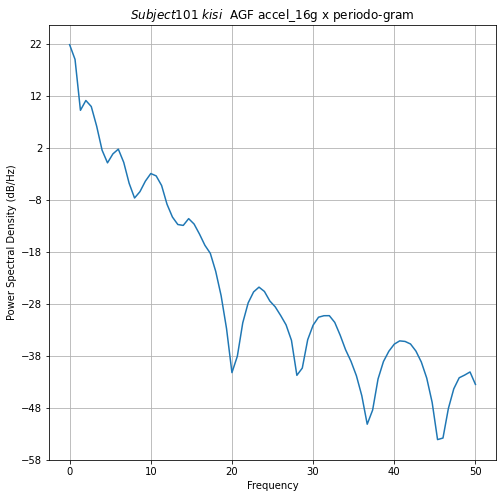

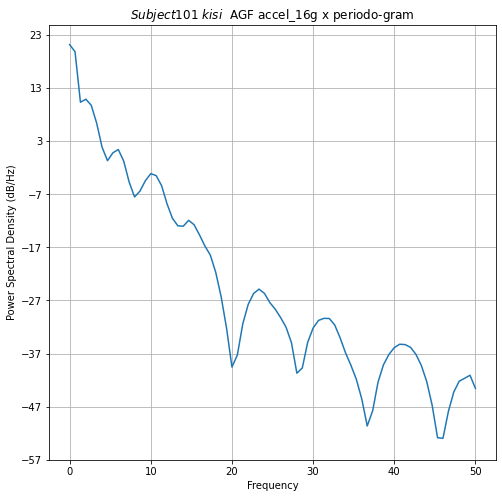

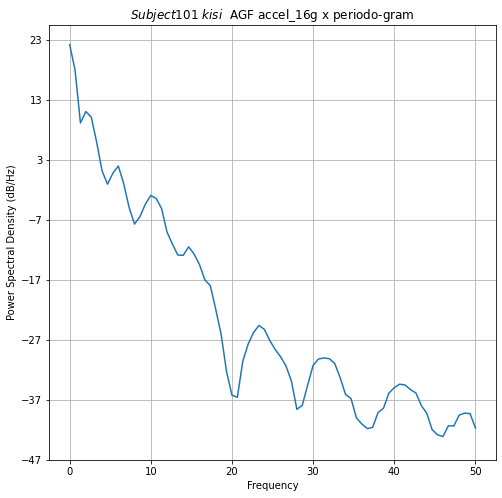

In [39]:
#### Subject101 AGF Uyguladıktan Sonra #### YÜRÜME VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,4)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(101)
length=150
noverlap=0
window_hannig=mlab.window_hanning
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap)

window_blackman=np.blackman(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_blackman,length,noverlap)

window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length,noverlap)


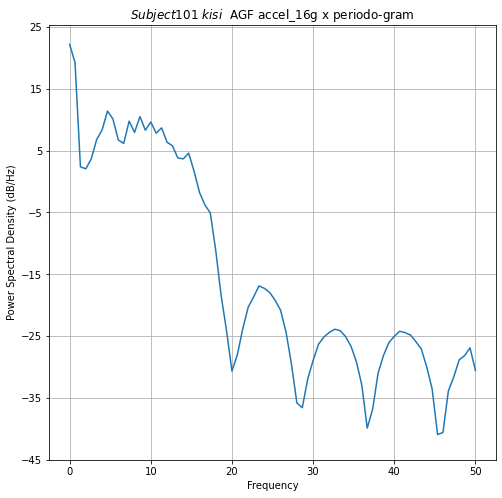

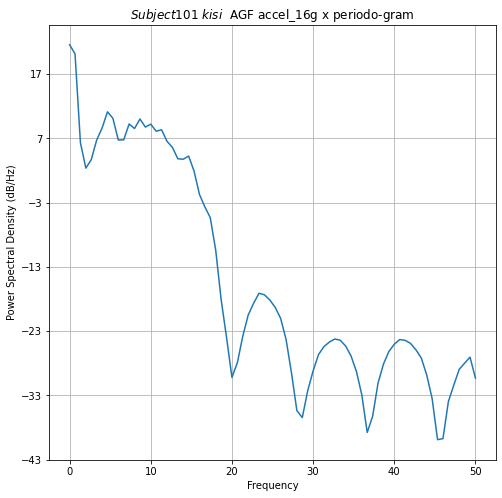

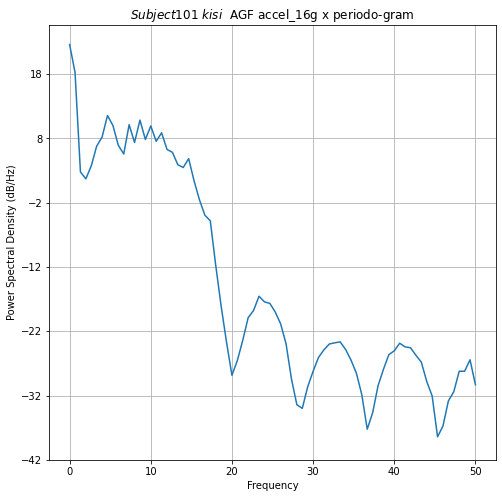

In [40]:
#### Subject101 AGF Uyguladıktan Sonra #### KOŞMA VERİLERİ ÜZERİNDE İNCELEME  #######
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,5)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(101)
length=150
noverlap=0
window_hannig=mlab.window_hanning
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap)

window_blackman=np.blackman(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_blackman,length,noverlap)

window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length,noverlap)

## Subject102 için hamming, hanning ve blackman pencerelerinin incelenmesi 

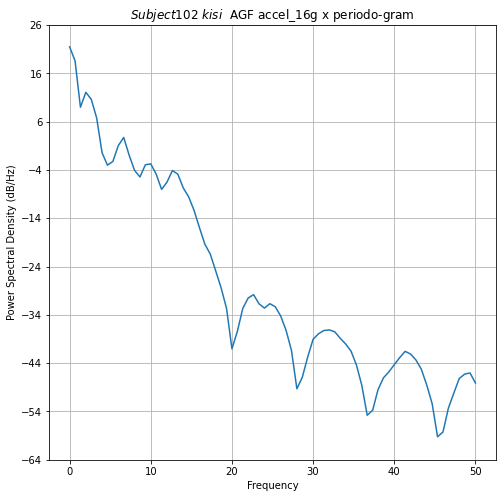

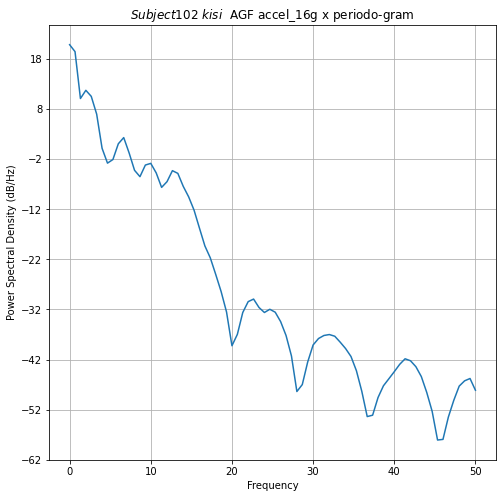

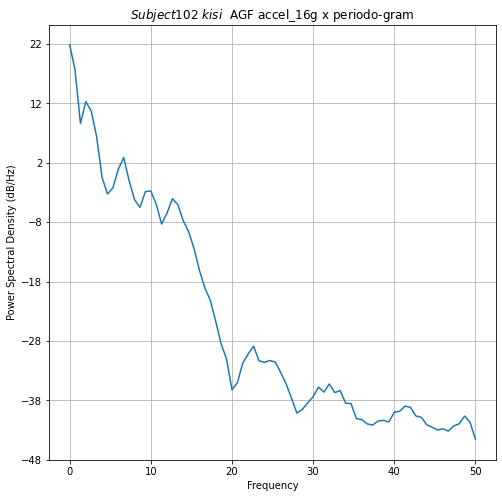

In [41]:
#### Subject102 AGF Uyguladıktan Sonra #### YÜRÜME VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,4)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(102)
length=150
noverlap=0
window_hannig=mlab.window_hanning
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap)

window_blackman=np.blackman(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_blackman,length,noverlap)

window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length,noverlap)

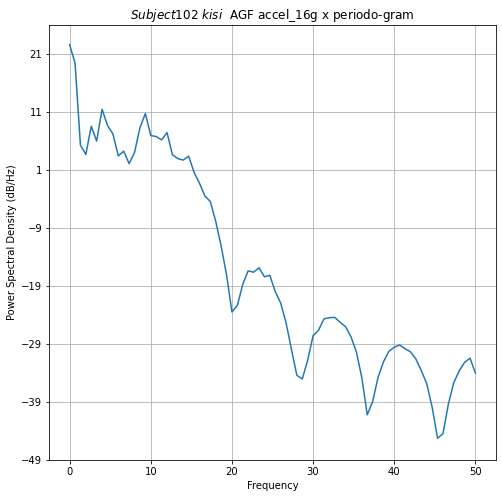

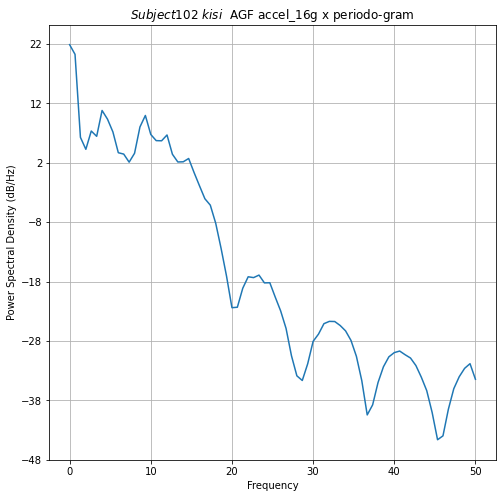

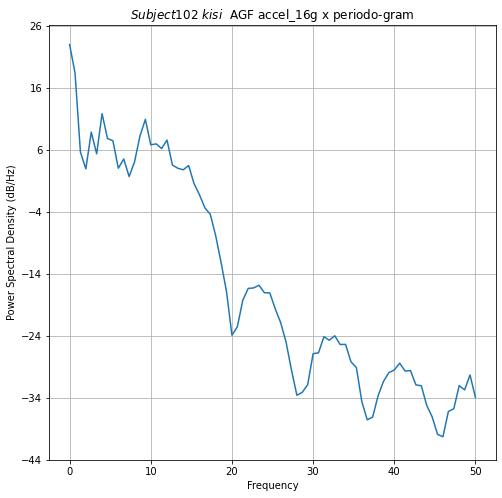

In [42]:
#### Subject102 AGF Uyguladıktan Sonra #### KOŞMA VERİLERİ ÜZERİNDE İNCELEME  #######
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,5)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(102)
length=150
noverlap=0
window_hannig=mlab.window_hanning
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap)

window_blackman=np.blackman(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_blackman,length,noverlap)

window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length,noverlap)

## Subject101 için hamming  Penceresinin Genişlik Etkisinin  İncelenmesi 

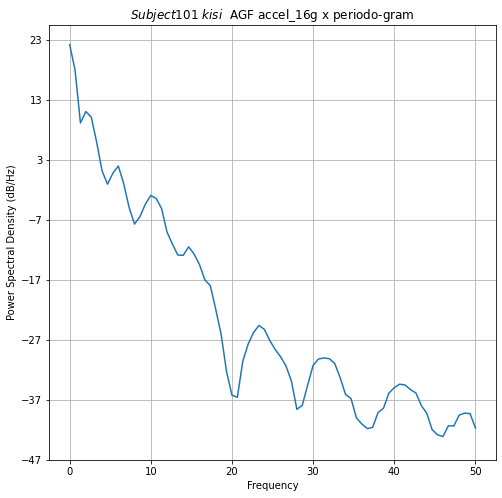

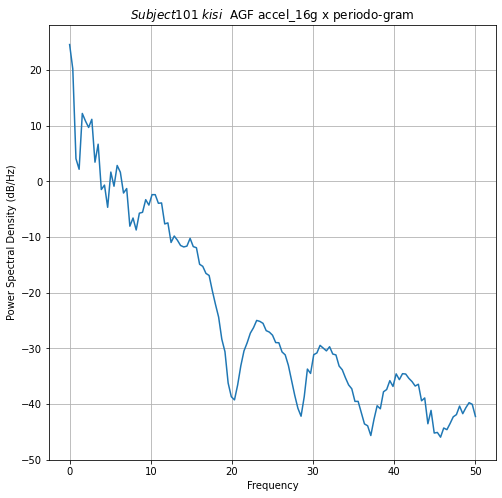

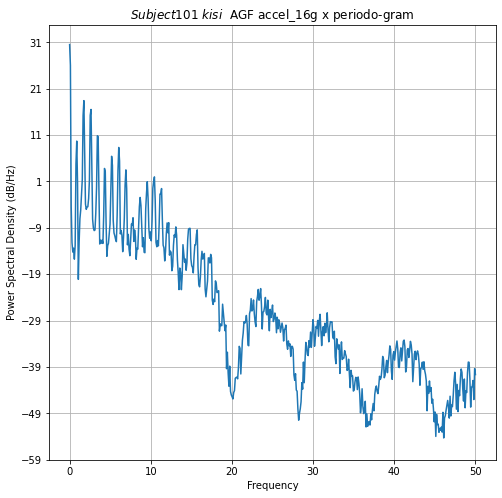

In [43]:
#### Subject101 AGF Uyguladıktan Sonra #### YÜRÜME VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,4)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(101)
length_150=150
noverlap=0
window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_150,noverlap)

length_256=256
window_hamming=np.hamming(length_256)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_256,noverlap)

length_1024=1024
window_hamming=np.hamming(length_1024)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_1024,noverlap)



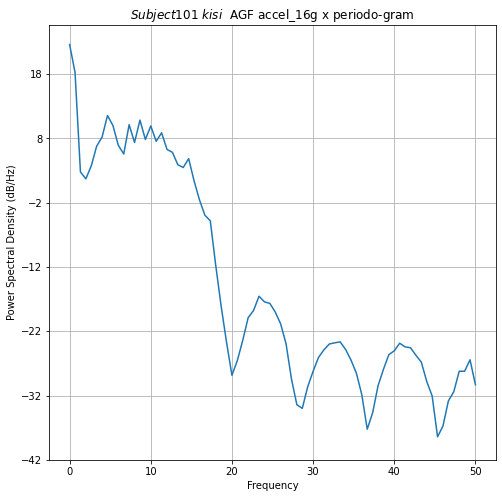

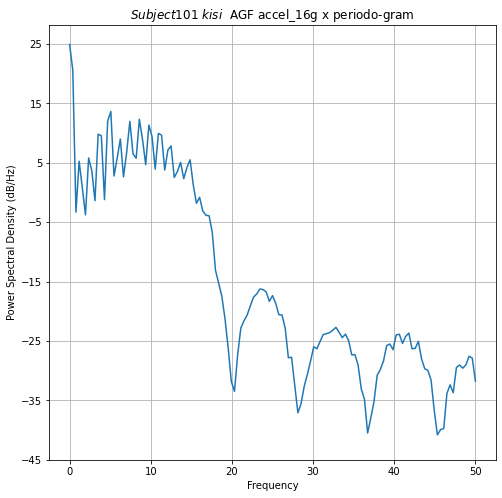

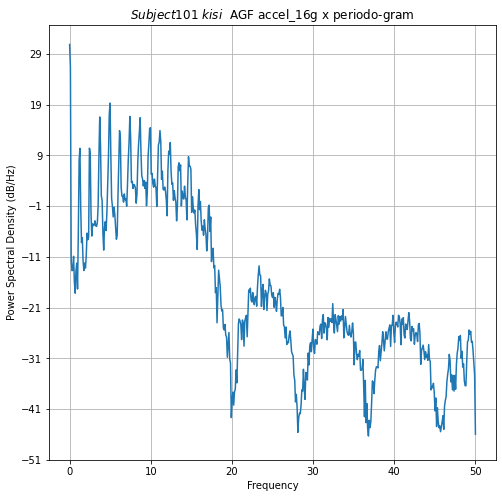

In [44]:
#### Subject101 AGF Uyguladıktan Sonra #### KOŞMA VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,5)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(101)
length_150=150
noverlap=0
window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_150,noverlap)

length_256=256
window_hamming=np.hamming(length_256)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_256,noverlap)

length_1024=1024
window_hamming=np.hamming(length_1024)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_1024,noverlap)


## Subject102 için hamming, hanning ve blackman pencerelerinin Genişlik Etkisinin  İncelenmesi 

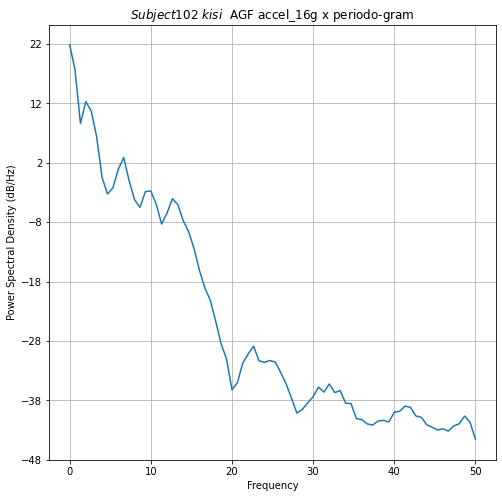

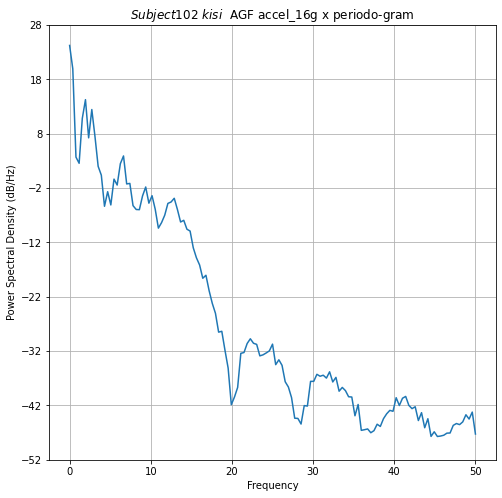

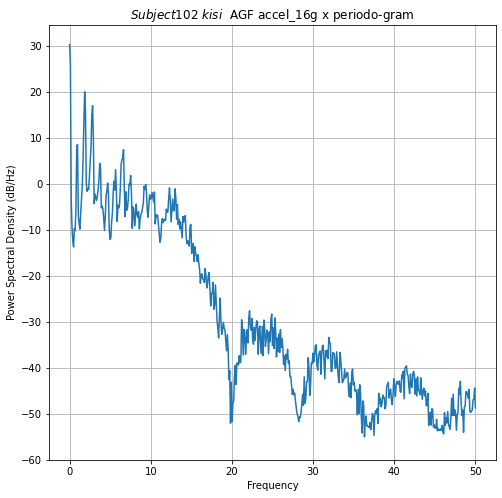

In [45]:
#### Subject102 AGF Uyguladıktan Sonra #### YÜRÜME VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,4)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(102)
length_150=150
noverlap=0
window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_150,noverlap)

length_256=256
window_hamming=np.hamming(length_256)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_256,noverlap)

length_1024=1024
window_hamming=np.hamming(length_1024)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_1024,noverlap)


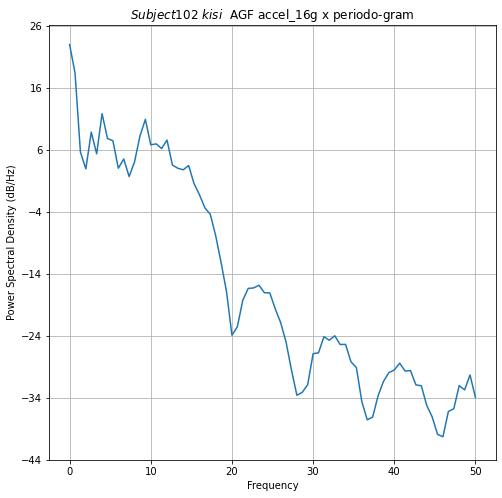

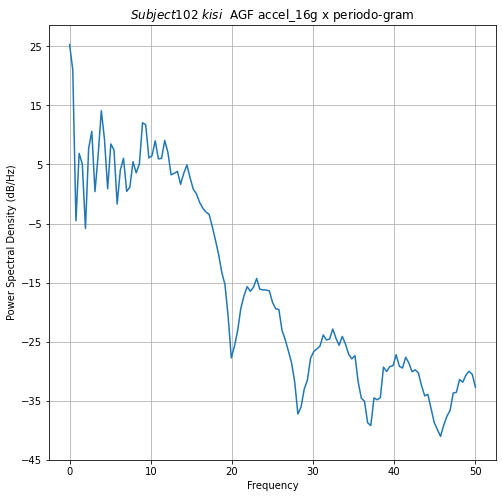

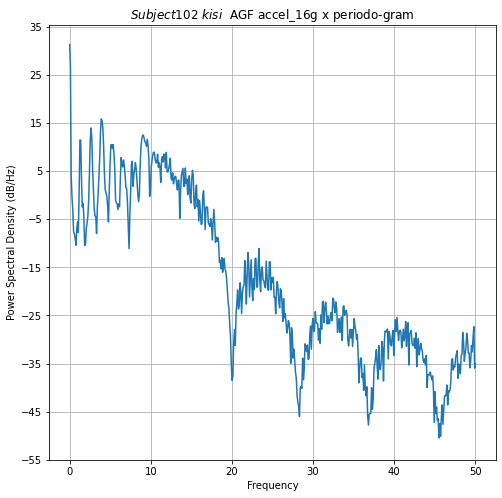

In [46]:
#### Subject102 AGF Uyguladıktan Sonra #### KOŞMA VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_102,ankle_imu,5)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(102)
length_150=150
noverlap=0
window_hamming=np.hamming(150)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_150,noverlap)

length_256=256
window_hamming=np.hamming(length_256)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_256,noverlap)

length_1024=1024
window_hamming=np.hamming(length_1024)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hamming,length_1024,noverlap)

## Subject101 için hamming Penceresinin overlap sayısının İncelenmesi

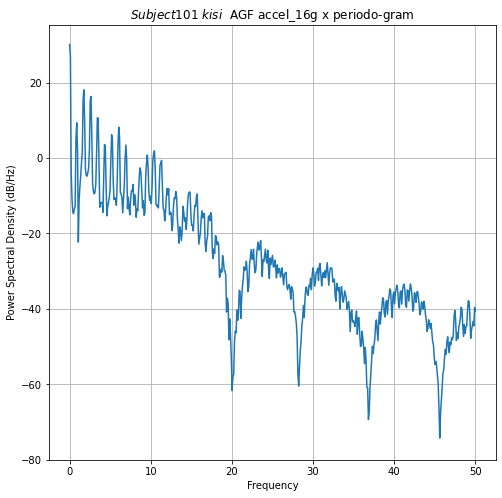

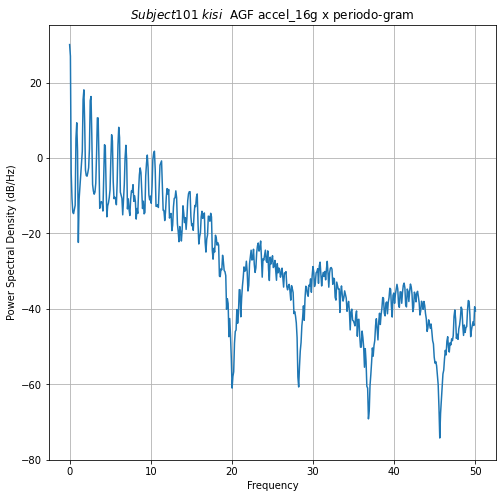

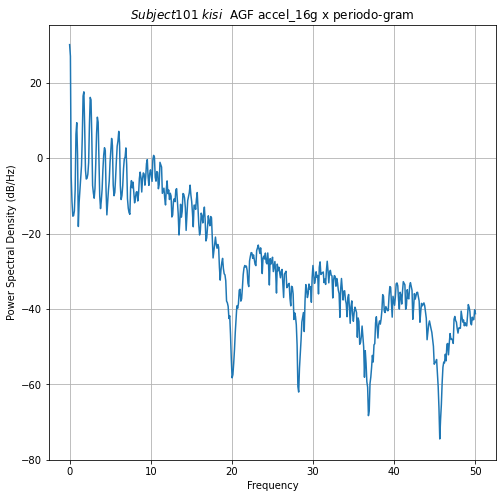

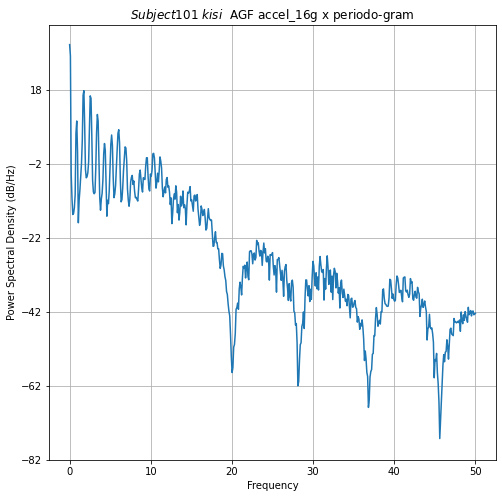

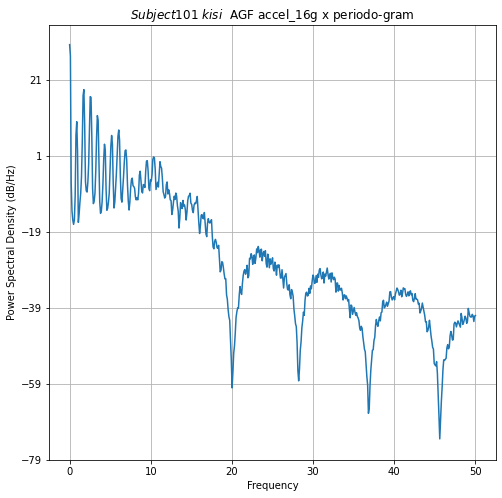

In [47]:
#### Subject101 AGF Uyguladıktan Sonra #### YÜRÜME VERİLERİ ÜZERİNDE İNCELEME  #####
accel_16g_x,accel_16g_y,accel_16g_z,accel_6g_x,accel_6g_y,accel_6g_z,gyro_x,gyro_y,gyro_z=GetData(adres_101,ankle_imu,4)
filter_path ='lowpass_15hz.mat'
data =accel_16g_x
title  = " AGF accel_16g"
eksen_bilgisi="x"
k=str(101)
length=1024
noverlap_10=10
noverlap_0=0
noverlap_50=50
noverlap_100=100
noverlap_1000=1000

window_hannig=mlab.window_hanning
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap_0)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap_10)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap_50)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap_100)
yn=Apply_Filter_windowType(filter_path,data,title,eksen_bilgisi,k,window_hannig,length,noverlap_1000)